In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm; tqdm.pandas()
pd.options.display.max_columns = 202
pd.options.display.max_rows = 300

In [2]:
train = pd.read_pickle('data/train_original.pkl')
test = pd.read_pickle('data/test_original.pkl')

In [3]:
special_cols = [col for col in train.columns if train[col].dtype != np.float64]
feature_cols = [col for col in train.columns if col not in special_cols]

In [4]:
all_df = pd.concat([train[feature_cols], test[feature_cols]], axis=0).reset_index(drop=True)
all_vc = pd.Series(np.concatenate(all_df.values)).value_counts()

In [5]:
def sort_values(row):
    return sorted(row.values)

train_sorted_rows = train[feature_cols].progress_apply(sort_values, axis=1)
test_sorted_rows = test[feature_cols].progress_apply(sort_values, axis=1)

100%|████████████████████████████████████████████████████████████████████| 200000/200000 [00:21<00:00, 9271.06it/s]


In [6]:
train.loc[:, feature_cols] = np.concatenate([np.array(v).reshape((1, len(feature_cols))) for v in train_sorted_rows], axis=0)
test.loc[:, feature_cols] = np.concatenate([np.array(v).reshape((1, len(feature_cols))) for v in test_sorted_rows], axis=0)

In [7]:
train.sort_values('var_0').head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
84338,train_84338,0,-90.2525,-31.6879,-21.2867,-20.3271,-15.2738,-13.9836,-11.3008,-10.7515,-9.1812,-8.0344,-7.3850,-7.1085,-6.9750,-6.1238,-6.1120,-5.9053,-5.8635,-5.5762,-5.5664,-5.1159,-4.0065,-2.8805,-2.8664,-2.1008,-1.3318,-1.2907,-1.2791,-1.2212,-1.1901,-1.0393,-0.9072,-0.6652,-0.5268,-0.4851,-0.4461,-0.1655,0.1089,0.1901,0.2144,0.2171,0.3855,0.5794,0.6067,0.6217,0.6891,0.7032,0.9393,1.0532,1.1209,1.2775,1.3561,1.4377,1.4746,1.5407,1.6758,1.9236,2.0578,2.3050,2.3544,2.4028,2.6910,3.2619,3.3744,3.5099,3.5414,3.6855,3.8889,4.1748,4.1950,4.2017,4.4040,4.5325,4.6118,4.6187,4.6952,4.7376,4.7827,4.8738,4.9948,5.0073,5.0367,5.1576,5.1772,5.1875,5.2356,5.2762,5.2959,5.4074,5.4099,5.7021,5.7220,5.8683,6.2582,6.4020,6.4786,6.4950,6.5549,6.6031,6.6378,6.6758,6.6941,6.7554,6.8115,6.8471,6.8506,6.9463,7.0787,7.1176,7.1557,7.2511,7.2934,7.2971,7.4820,7.5116,7.5665,7.8811,7.9517,8.0702,8.2776,8.3308,8.3691,8.8719,8.9960,9.0072,9.2023,9.2830,9.3505,9.4635,9.6058,9.6170,10.0089,10.1910,10.2006,10.4251,10.6791,10.7721,10.8153,11.0312,11.1932,11.2283,11.2735,11.4398,11.6340,11.7315,11.7693,11.7726,11.7828,12.0714,12.0898,12.1634,12.2320,12.2959,12.3637,12.4186,12.5102,12.7195,12.7356,12.8055,12.9004,12.9891,13.0038,13.0175,13.1256,13.2140,13.3800,13.5805,13.7103,13.7991,13.8735,13.9680,14.0493,14.0634,14.3827,14.6118,14.6219,14.6954,15.1809,15.2273,15.8425,15.8936,16.1376,16.8055,18.0186,18.0424,18.0871,18.4488,18.9416,19.2294,19.6359,20.0245,20.2143,20.7072,20.8526,21.5172,22.4561,22.5233,24.6796,24.7824,35.4969,37.2613
22995,train_22995,0,-83.1075,-25.9622,-17.7047,-16.1272,-10.7576,-10.7048,-10.4536,-9.9314,-9.8045,-9.6122,-9.1751,-8.3653,-8.2278,-7.7040,-6.7221,-6.5782,-5.6605,-5.2480,-5.0528,-5.0114,-4.8655,-3.4557,-2.7237,-2.6039,-2.5957,-1.8948,-1.7995,-1.4640,-1.4200,-1.1076,-1.0457,-0.5341,-0.4605,-0.1011,0.1207,0.2895,0.3918,0.4393,0.5168,0.5198,0.5649,0.7501,0.9807,1.0380,1.1469,1.1750,1.2151,1.2391,1.4938,1.6776,1.7793,2.0447,2.0556,2.1086,2.1853,2.2265,2.3247,2.4555,2.4896,2.5342,2.8154,2.8925,3.0022,3.0751,3.0785,3.1166,3.1435,3.1445,3.2616,3.3478,3.5793,3.6002,3.6210,3.7723,3.7837,3.8907,3.8990,4.2265,4.3345,4.4542,4.5012,4.5298,4.5478,4.6932,4.9109,4.9751,5.0165,5.0549,5.0906,5.2182,5.2363,5.4586,5.6768,5.7003,5.7213,5.8274,6.2188,6.2287,6.4146,6.5055,6.7022,6.7180,6.7748,6.8608,6.8926,7.0505,7.0735,7.2587,7.2639,7.2756,7.7539,7.7657,7.9194,7.9548,8.3140,8.3255,8.3417,8.4687,8.5885,8.7317,8.7805,8.8037,9.0766,9.1080,9.1480,9.1756,9.3479,9.3819,9.4

In [8]:
test.sort_values('var_0').head(10)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
7796,test_7796,-83.6921,-18.7858,-16.7334,-13.8526,-13.3160,-13.0566,-12.1850,-11.4202,-9.8857,-8.5010,-8.0323,-7.6776,-7.0302,-5.6756,-5.6477,-5.5485,-5.3589,-5.0818,-3.8270,-3.5564,-3.5003,-3.4882,-3.4386,-3.2340,-3.1623,-3.0698,-2.7039,-2.6465,-2.3757,-2.1217,-1.9527,-1.5680,-1.5595,-1.4055,-1.2804,-1.2352,-1.2089,-1.1756,-0.8610,-0.8381,-0.5712,-0.4777,-0.4425,-0.1733,0.2833,0.6332,0.8115,0.9834,1.1607,1.1757,1.2287,1.4412,1.4438,1.4672,1.6013,1.6471,1.7122,2.2386,2.3423,2.3450,2.6044,2.7732,2.7847,2.9157,3.1904,3.3018,3.3671,3.4660,3.8936,3.8994,4.0797,4.0817,4.1648,4.2410,4.3227,4.3432,4.3821,4.7466,4.8830,5.0158,5.2285,5.3031,5.3349,5.4352,5.6058,5.6831,5.7498,5.8720,5.9433,6.0167,6.0689,6.3350,6.3929,6.4290,6.4492,6.6186,6.6835,6.9508,6.9659,7.1294,7.1460,7.2528,7.6279,7.6401,8.0078,8.0203,8.1292,8.2964,8.3576,8.6590,8.7037,8.7054,8.7767,8.8778,9.0024,9.0286,9.0561,9.2055,9.3200,9.3751,9.4490,9.4722,9.8203,9.8405,9.9395,10.0483,10.0729,10.1128,10.1882,10.5974,10.7016,10.7288,11.1327,11.2688,11.3184,11.4186,11.4224,11.6263,11.6496,11.6601,11.8730,11.9227,12.1731,12.2251,12.2522,12.3856,12.3868,12.3889,12.4446,12.5508,12.6307,12.7286,13.3388,13.3894,13.4239,13.5026,13.5602,13.6299,13.6309,13.6447,13.6700,13.8553,13.8843,13.9393,14.0273,14.0494,14.3315,14.5157,14.6742,14.7495,14.7803,14.8345,15.0350,15.1462,15.4954,15.7010,15.7181,15.7598,15.8978,16.1418,16.1664,16.3217,16.4340,17.8513,19.0348,20.3301,20.4888,21.0962,21.0968,21.5144,21.5880,22.4385,22.5309,22.8494,23.2030,23.4914,26.5418,28.2467,28.9421,47.4333
4982,test_4982,-80.8747,-28.6509,-17.8732,-15.7203,-15.0484,-14.1821,-13.7381,-13.4699,-13.1251,-12.8717,-11.9022,-11.1734,-9.6430,-9.3712,-8.5611,-8.5555,-7.1769,-6.7060,-4.3417,-4.3051,-4.1782,-3.3109,-3.1700,-3.1281,-2.8544,-2.5916,-2.3397,-2.2457,-2.0450,-1.6266,-1.5316,-1.3061,-1.2945,-1.1647,-1.0135,-0.9810,-0.8844,-0.8031,-0.7624,-0.5834,-0.3383,0.0195,0.0303,0.1962,0.3892,0.9657,1.0738,1.1919,1.1981,1.3898,1.4103,1.4313,1.6092,1.7226,1.8040,1.8672,1.9909,2.0641,2.1162,2.3058,2.5079,2.8056,3.2554,3.2983,3.3901,3.4698,3.6619,3.6694,3.9080,3.9865,4.0091,4.1790,4.4269,4.4520,4.5401,4.5849,4.6210,4.7456,4.7549,4.8495,4.8955,4.9420,5.0195,5.0263,5.1023,5.1061,5.2450,5.4137,5.5295,5.7355,5.8223,5.9065,5.9148,5.9804,6.1385,6.1777,6.2039,6.6028,6.6173,6.7099,6.7159,6.7289,6.7636,7.0181,7.0490,7.1484,7.1520,7.1610,7.3960,7.5159,7.5471,7.7074,7.7606,7.8586,7.8722,8.1883,8.3368,8.3440,8.3675,8.3745,8.5210,8.5456,8.5496,8.7393,8.7399,8.7507,9.0232,9.

In [9]:
print(train['var_0'].nunique())
vc = train['var_0'].value_counts()
vc= vc[vc>1]; print(len(vc))
vc

143823
42552


-24.8917    8
-19.4988    7
-25.7142    7
-24.3455    7
-32.3743    7
-26.6280    7
-27.1632    7
-37.4191    7
-24.0555    7
-29.7472    7
-26.1566    6
-26.1948    6
-28.9598    6
-28.3102    6
-29.8586    6
-31.2929    6
-32.4137    6
-24.0431    6
-29.5608    6
-29.9469    6
-27.6353    6
-22.3958    6
-31.0624    6
-29.6802    6
-23.0154    6
-36.1829    6
-31.9732    6
-34.3575    6
-27.0576    6
-28.3559    6
-32.2217    6
-32.5011    6
-29.2800    6
-31.6783    6
-25.6674    6
-24.2408    6
-23.7147    6
-23.9432    6
-30.3750    6
-24.5935    6
-30.8371    6
-27.5519    6
-28.9073    6
-22.2553    6
-30.9640    6
-23.2590    6
-24.3041    6
-26.5573    6
-31.2139    6
-23.7235    6
-23.9986    6
-25.4121    6
-29.2732    6
-31.4986    6
-26.9597    6
-29.0665    6
-29.2984    6
-25.1230    6
-26.7954    6
-24.3561    6
-28.1430    6
-26.6385    6
-23.7514    6
-27.6745    6
-25.4384    6
-32.5259    6
-28.7924    6
-30.2512    6
-31.5756    6
-26.9405    6
-36.6671    6
-26.65

In [10]:
'''
for v in tqdm(vc.index):
    if 1 in train.loc[train['var_0']==v,'target'].values:
        print(v)
'''

"\nfor v in tqdm(vc.index):\n    if 1 in train.loc[train['var_0']==v,'target'].values:\n        print(v)\n"

In [11]:
train.loc[train['var_0']==-24.3455,]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
29679,train_29679,0,-24.3455,-20.7118,-12.2355,-11.8998,-11.2239,-10.7446,-10.3164,-10.0835,-8.0944,-7.2276,-7.2092,-6.6191,-5.7516,-4.9006,-4.6541,-4.6003,-4.5912,-4.5758,-4.4043,-3.8712,-3.8414,-3.1994,-3.0057,-2.7753,-2.7006,-2.1633,-2.0017,-1.7126,-1.6205,-1.6143,-1.1839,-1.1473,-1.1367,-0.9785,-0.9668,-0.5558,-0.5151,-0.4225,-0.1800,-0.1240,-0.0156,0.3929,0.7186,0.8493,0.8702,1.2904,1.2983,1.3011,1.3741,1.3934,1.4154,1.4448,1.4861,1.4979,1.5514,1.5727,2.4084,2.6252,2.7697,2.8380,3.1128,3.1621,3.1750,3.3837,3.4250,3.5643,3.6193,3.8633,3.9928,4.0731,4.1615,4.1678,4.1751,4.3553,4.4209,4.5527,4.8746,4.9184,4.9243,4.9418,5.0299,5.1742,5.1895,5.2113,5.2217,5.3030,5.4891,5.5281,5.6886,5.7298,5.7435,5.9185,5.9805,6.0213,6.1154,6.2884,6.3527,6.3772,6.3964,6.4517,6.8183,6.8290,6.8455,7.0791,7.1056,7.1230,7.1828,7.2118,7.3361,7.4572,7.5009,7.6756,7.7660,7.9251,7.9953,8.0374,8.1486,8.2075,8.2924,8.3526,8.5369,8.5705,8.5830,8.7047,8.7295,8.9228,8.9808,9.0158,9.1331,9.3815,9.6934,9.7082,10.0497,10.4027,10.5099,10.6811,10.7134,10.7867,10.8253,10.9209,10.9936,11.0366,11.1362,11.6341,11.6925,11.8645,11.8976,12.0012,12.0569,12.1453,12.2105,12.3086,12.3699,12.4258,12.4927,12.5772,12.5874,12.7122,12.8047,13.0229,13.2411,13.2506,13.3431,13.3571,13.3779,13.8807,14.0904,14.0956,14.2789,14.2963,14.3858,14.4090,14.6130,14.8432,15.0191,15.0312,15.2574,15.2915,15.9686,16.2874,16.4204,16.5032,16.5873,17.1244,17.4873,17.7643,18.1804,18.7366,19.4684,21.2304,22.4857,22.5673,23.0270,23.3977,23.4185,24.8662,25.0623,26.1164,31.6719,39.8315
36931,train_36931,0,-24.3455,-15.4824,-12.2356,-11.7271,-8.3661,-8.0744,-7.5141,-7.0378,-6.8208,-6.1852,-6.1423,-5.8509,-5.3776,-4.9569,-4.5516,-4.1284,-3.6617,-3.6379,-2.8002,-2.6469,-2.4382,-2.3965,-2.2627,-2.2289,-1.9769,-1.9563,-1.7484,-1.5230,-1.2756,-1.2535,-1.0604,-0.9864,-0.8022,-0.7996,-0.5871,-0.4118,-0.0830,0.0132,0.0270,0.0639,0.3045,0.3087,0.4968,0.7056,0.8007,0.8821,0.9972,1.0601,1.1386,1.2716,1.2975,1.3139,1.3696,1.5038,1.5150,2.0258,2.1221,2.2528,2.2773,2.4452,2.6217,3.1315,3.1952,3.2637,3.3311,3.3604,3.8936,4.0375,4.0954,4.1027,4.2513,4.3153,4.6078,4.8650,4.9258,4.9638,4.9675,5.0154,5.0302,5.0475,5.0652,5.1137,5.2357,5.5176,5.5427,5.5476,5.6842,5.7308,5.8357,5.8398,5.8932,5.9054,6.1523,6.1740,6.4905,6.5237,6.7026,6.7854,7.0343,7.0426,7.2240,7.2412,7.2600,7.2769,7.4980,7.5616,7.5691,7.6783,7.8764,7.9468,8.2922,8.3274,8.4150,8.4528,8.5543,8.5670,8.6652,8.7774,8.9760,9.0185,9.0225,9.0825,9.1591,9.4020,9.4683,9.5311,9.5792,9.8221,

In [12]:
train.loc[train['var_0']==-32.3743,]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
15535,train_15535,0,-32.3743,-18.1739,-15.8632,-12.5768,-11.6357,-11.1699,-10.7194,-10.0616,-10.0564,-9.9405,-9.2611,-8.9251,-8.4169,-8.1564,-8.0985,-7.9659,-7.4306,-6.3543,-6.2703,-5.8360,-5.1092,-4.4943,-4.3854,-3.2559,-3.0232,-2.8972,-2.6872,-2.5020,-1.9519,-1.2845,-1.2774,-0.8477,-0.8387,-0.8236,-0.7115,-0.7038,-0.6455,-0.5961,-0.3242,-0.2909,-0.1636,-0.1294,0.1799,0.3558,0.4594,0.6831,0.7401,1.0069,1.0316,1.2352,1.3042,1.3846,1.4061,1.4864,1.4930,1.6740,1.9067,2.0211,2.0369,2.4148,2.4745,2.5400,2.5629,2.6226,3.0228,3.0559,3.5419,3.6780,3.8384,3.9841,3.9853,4.0169,4.0527,4.1707,4.4588,4.4964,4.5870,4.7016,4.7073,4.7686,4.7859,4.8247,5.0257,5.0532,5.0709,5.1589,5.2182,5.4579,5.5811,5.6233,5.6356,5.6606,5.7598,5.9432,5.9892,6.0276,6.0490,6.1319,6.1915,6.2111,6.2759,6.3060,6.4318,6.5689,6.8053,6.8601,6.8728,6.8864,6.9456,6.9512,6.9788,7.2983,7.3747,7.5113,7.5897,7.6171,8.1404,8.1863,8.2089,8.3985,8.4093,8.4463,8.4613,8.8749,9.1531,9.2683,9.3198,9.5437,9.6499,9.6764,9.9547,9.9735,9.9838,10.0519,10.2079,10.2692,10.3168,10.6831,10.6881,10.8731,10.8863,11.0431,11.4578,11.4932,11.5925,11.6586,11.8863,12.0248,12.0699,12.2399,12.4607,12.4795,12.6894,12.6953,12.9344,13.0953,13.2199,13.4061,13.5814,13.7836,13.9122,13.9845,14.0583,14.0674,14.2043,14.2616,14.2860,14.4848,14.5602,14.6306,14.8981,16.0191,16.0953,16.1606,16.2671,16.9180,17.0271,17.1903,17.3174,17.4548,17.6637,17.8061,18.6699,18.7349,18.8730,19.2591,19.3251,19.5123,19.9804,20.3288,20.5956,20.6199,22.3732,25.5870,25.7692,26.5267,31.5141,31.6056,32.1911,38.4098
37936,train_37936,1,-32.3743,-25.6936,-22.1644,-21.9836,-21.4742,-12.4918,-12.4242,-10.4321,-10.0736,-8.7807,-7.3288,-5.5798,-5.1333,-5.1258,-5.0481,-4.7188,-4.5878,-4.1483,-3.7312,-3.6993,-3.6146,-3.5579,-3.0120,-2.2769,-2.2104,-2.1240,-2.0850,-1.1269,-1.1255,-0.9294,-0.7014,-0.5979,-0.4575,-0.3508,-0.3353,-0.2917,-0.2282,-0.1849,0.0044,0.1847,0.4256,0.4334,0.4923,0.6037,0.7282,0.7540,1.0026,1.0097,1.2346,1.4196,1.8000,1.8541,1.8596,2.5966,2.7993,2.8974,3.1168,3.2447,3.3146,3.3376,3.3467,3.3678,3.4583,3.6390,3.6425,3.7787,3.8578,3.9070,4.0842,4.2339,4.2601,4.2862,4.6270,5.0198,5.0312,5.1004,5.2242,5.2577,5.2668,5.2679,5.2926,5.3418,5.3605,5.5003,5.5319,5.6687,5.6702,5.8006,5.8825,5.9498,5.9934,6.1312,6.2176,6.2756,6.3430,6.4967,6.5047,6.6979,6.9183,7.1205,7.1368,7.1464,7.2356,7.2495,7.3504,7.3703,7.4634,7.5519,7.5616,8.2005,8.2665,8.2907,8.2932,8.3373,8.4216,8.4221,8.4651,8.7310,8.7475,8.9864,9.0202,9.0238,9.5948,9.7208,9.9022,9.9690,10.0037

In [13]:
#train.loc[train['target']==1,] # I found magic 0.4090 and -0.4090

In [14]:
train[feature_cols].values.sum(), test[feature_cols].values.sum()

(270697954.1227005, 270782060.1730003)

In [15]:
all_df = pd.concat([train[feature_cols], test[feature_cols]], axis=0).reset_index(drop=True)
all_vc = pd.Series(np.concatenate(all_df.values)).value_counts()

In [16]:
magic_index = []
for index in tqdm(all_vc.index):
    if index > 0 and -index in all_vc.index:
        magic_index += [index]
        
len(magic_index), len(magic_index)*2, len(all_vc.index), len(magic_index)/len(all_vc.index), len(magic_index)*2/len(all_vc.index)

100%|██████████████████████████████████████████████████████████████████| 874495/874495 [00:01<00:00, 740469.94it/s]


(381200, 762400, 874495, 0.4359087244638334, 0.8718174489276668)

100%|███████████████████████████████████████████████████████████████████| 381200/381200 [00:09<00:00, 41897.02it/s]


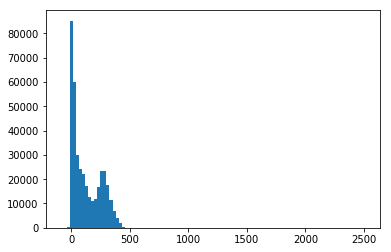

In [17]:
balanced_cnt = []
for ix in tqdm(magic_index):
    balanced_cnt += [all_vc[ix]-all_vc[-ix]]
    
balanced_cnt = pd.Series(index=magic_index, data=balanced_cnt)
plt.hist(balanced_cnt, bins=100); plt.show()

In [18]:
all_vc.loc[5.0215], all_vc.loc[-5.0215]

(2592, 81)

In [19]:
all_vc.sum()

80000000

In [20]:
1.021 in all_vc.index, 1.021 in all_vc.index.values, 978 in all_vc.index

(True, True, False)

In [21]:
balanced_cnt

5.0215     2511
5.0209     2441
5.0179     2426
5.0201     2406
5.0197     2401
5.0188     2389
5.0184     2409
5.0203     2375
5.0192     2394
5.0158     2358
5.0200     2374
5.0152     2364
5.0214     2369
5.0208     2376
5.0212     2354
5.0193     2321
5.0198     2330
5.0211     2340
5.0189     2352
5.0210     2321
5.0202     2351
5.0185     2339
5.0207     2351
5.0181     2336
5.0194     2323
5.0174     2346
5.0199     2327
5.0205     2313
5.0195     2298
5.0183     2285
5.0218     2306
5.0196     2285
5.0172     2286
5.0222     2288
5.0227     2294
5.0229     2301
5.0157     2285
5.0177     2284
5.0186     2253
5.0216     2267
5.0187     2279
5.0168     2273
5.0190     2270
5.0221     2254
5.0175     2271
5.0226     2258
5.0191     2239
5.0164     2273
5.0149     2281
5.0223     2239
5.0178     2224
5.0154     2250
5.0213     2232
5.0170     2259
5.0165     2239
5.0232     2240
5.0151     2240
5.0162     2240
5.0228     2226
5.0180     2222
5.0159     2213
5.0153     2224
5.0217  

In [22]:
balanced_cnt[balanced_cnt>0].sum(), balanced_cnt[balanced_cnt==0].sum(), balanced_cnt[balanced_cnt<0].sum()

(48533447, 0, -22454)

In [23]:
(train['target']==1).sum()

20098

In [24]:
magic_digits = []
magic_num = []
for i in range(-100, 100, 1):
    if i > 0:
        if (i+0.021) in all_vc.index and (i+0.1111) in all_vc.index:
            magic_digits += [i]
            magic_num += [i+0.021, i+0.1111]
    else:
        if (i-0.021) in all_vc.index and (i-0.1111) in all_vc.index:
            magic_digits += [i]
            magic_num += [i-0.021, i-0.1111]
            
len(magic_digits), all_vc.loc[magic_num].sum()

(69, 13579)